In [17]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import scanpy as sc
import anndata
import subprocess
import scipy.stats as stats

import scanpy as sc

df_short  = pd.read_csv("CellAssignOutputshort.csv", index_col = 0)
df_long  = pd.read_csv("CellAssignOutputlong.csv", index_col = 0)
df_dev  = pd.read_csv("CellAssignOutputSTdev.csv", index_col = 0)




In [18]:
sample = sc.read_h5ad("../data/filtered_cellassign_adata_BI.h5ad")

In [19]:
sample.obs['Unnamed: 0']

0         PA001_GCGAGAAGTACTTAGC-1
1         PA001_TCGGTAAAGGCAAAGA-1
2         PA001_CTCTAATCATGAGCGA-1
3         PA001_CTTTGCGAGACTGTAA-1
4         PA001_GTTACAGTCCAGAGGA-1
                    ...           
154766    STK_1_TGTCCCAAGCACCGTC-1
154767    STK_1_GTAACGTTCGCACTCT-1
154768    STK_1_AACTGGTTCAACCAAC-1
154769    STK_1_CTCTGGTTCCTCAATT-1
154770    STK_1_AACTCTTAGTGTGGCA-1
Name: Unnamed: 0, Length: 154771, dtype: object

In [20]:
df_short.index = sample.obs["Unnamed: 0"]
df_short
df_short.index.names = ['Cell']

df_long.index = sample.obs["Unnamed: 0"]
df_long
df_long.index.names = ['Cell']


df_dev.index = sample.obs["Unnamed: 0"]

df_dev.index.names = ['Cell']

In [21]:
"""df_covid.to_csv("CellMatchCellAssignResultscovid.csv")
df_epi.to_csv("CellMatchCellAssignResultsepi.csv")
df_laugh.to_csv("CellMatchCellAssignResultslaughney.csv")
"""

'df_covid.to_csv("CellMatchCellAssignResultscovid.csv")\ndf_epi.to_csv("CellMatchCellAssignResultsepi.csv")\ndf_laugh.to_csv("CellMatchCellAssignResultslaughney.csv")\n'

In [22]:
"""!aws s3 cp CellMatchCellAssignResultscovid.csv s3://nscl-seq/Epithelial_Ctrl_NSCLC_tumor_Karan/cellassign_tumor_results/
!aws s3 cp CellMatchCellAssignResultsepi.csv s3://nscl-seq/Epithelial_Ctrl_NSCLC_tumor_Karan/cellassign_tumor_results/
!aws s3 cp CellMatchCellAssignResultslaughney.csv s3://nscl-seq/Epithelial_Ctrl_NSCLC_tumor_Karan/cellassign_tumor_results/
"""


'!aws s3 cp CellMatchCellAssignResultscovid.csv s3://nscl-seq/Epithelial_Ctrl_NSCLC_tumor_Karan/cellassign_tumor_results/\n!aws s3 cp CellMatchCellAssignResultsepi.csv s3://nscl-seq/Epithelial_Ctrl_NSCLC_tumor_Karan/cellassign_tumor_results/\n!aws s3 cp CellMatchCellAssignResultslaughney.csv s3://nscl-seq/Epithelial_Ctrl_NSCLC_tumor_Karan/cellassign_tumor_results/\n'

In [23]:
sample = sc.read_h5ad("../data/filtered_cellassign_adata_BI.h5ad")
sample.obs = sample.obs.set_index("Unnamed: 0")
sample.obs.index = sample.obs.index.rename('cell')

In [24]:
sample.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.rps,percent.rpl,percent.rp,patient_long,patient,predicted_doublets,...,celltype_hpca_main,celltype_hpca_fine,celltype_mid_main,celltype_mid_fine,Primary_vs_BM,STK11mut_vs_NonSTK11mut,Primary_BM_STK_NonSTK,Primary_vs_BM_vs_CHEST_WALL_MET,Primary_BM_STK_NonSTK_CHEST_WALL_MET,size_factor
cell,,,,,,,,,,,,,,,,,,,,,
PA001_GCGAGAAGTACTTAGC-1,PA001,20491,6976,0.590503,0.214728,0.175687,0.390415,nsclpa001_5p,nsclpa001_5p,False,...,Embryonic_stem_cells,NaN,Progenitors,Progenitor cells,BRAIN_METS,Non-STK11-mut,Non-STK11-mut (BRAIN_METS),BRAIN_METS,Non-STK11-mut (BRAIN_METS),0.999976
PA001_TCGGTAAAGGCAAAGA-1,PA001,18659,5631,1.045072,0.117906,0.123265,0.241170,nsclpa001_5p,nsclpa001_5p,False,...,Osteoblasts,Endothelial_cells:lymphatic:TNFa_48h,Progenitors,Progenitor cells,BRAIN_METS,Non-STK11-mut,Non-STK11-mut (BRAIN_METS),BRAIN_METS,Non-STK11-mut (BRAIN_METS),1.000031
PA001_CTCTAATCATGAGCGA-1,PA001,17974,5562,0.867920,0.139090,0.127963,0.267052,nsclpa001_5p,nsclpa001_5p,False,...,Fibroblasts,Tissue_stem_cells:BM_MSC:BMP2,Progenitors,Progenitor cells,BRAIN_METS,Non-STK11-mut,Non-STK11-mut (BRAIN_METS),BRAIN_METS,Non-STK11-mut (BRAIN_METS),0.999994
PA001_CTTTGCGAGACTGTAA-1,PA001,11223,4085,1.603849,0.115834,0.115834,0.231667,nsclpa001_5p,nsclpa001_5p,False,...,Endothelial_cells,Endothelial_cells:lymphatic:KSHV,Progenitors,Non classical monocytes,BRAIN_METS,Non-STK11-mut,Non-STK11-mut (BRAIN_METS),BRAIN_METS,Non-STK11-mut (BRAIN_METS),0.999994
PA001_GTTACAGTCCAGAGGA-1,PA001,9885,4203,1.406171,0.060698,0.091047,0.151745,nsclpa001_5p,nsclpa001_5p,False,...,Endothelial_cells,Endothelial_cells:lymphatic:KSHV,Progenitors,Non classical monocytes,BRAIN_METS,Non-STK11-mut,Non-STK11-mut (BRAIN_METS),BRAIN_METS,Non-STK11-mut (BRAIN_METS),1.000021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STK_1_TGTCCCAAGCACCGTC-1,STK_1,823,641,7.654921,1.579587,3.159174,4.738761,nsclc_stk_1_5pv2_S25_L003,nsclc_stk_1_5pv2_S25_L003,False,...,Astrocyte,Astrocyte:Embryonic_stem_cell-derived,NK cells,Non-Vd2 gd T cells,BRAIN_METS,STK11-mut,STK11-mut (BRAIN_METS),BRAIN_METS,STK11-mut (BRAIN_METS),1.000003
STK_1_GTAACGTTCGCACTCT-1,STK_1,810,652,4.567901,2.469136,3.703704,6.172840,nsclc_stk_1_5pv2_S25_L003,nsclc_stk_1_5pv2_S25_L003,False,...,Neuroepithelial_cell,Neurons:adrenal_medulla_cell_line,Dendritic cells,Plasmablasts,BRAIN_METS,STK11-mut,STK11-mut (BRAIN_METS),BRAIN_METS,STK11-mut (BRAIN_METS),1.000002
STK_1_AACTGGTTCAACCAAC-1,STK_1,807,669,3.965304,2.354399,3.593556,5.947955,nsclc_stk_1_5pv2_S25_L003,nsclc_stk_1_5pv2_S25_L003,False,...,Astrocyte,Astrocyte:Embryonic_stem_cell-derived,Progenitors,Th2 cells,BRAIN_METS,STK11-mut,STK11-mut (BRAIN_METS),BRAIN_METS,STK11-mut (BRAIN_METS),1.000002


In [25]:
df_short.to_csv("ShortSignatures_CellAssignOutput.csv")

df_long.to_csv("LongSignatures_CellAssignOutput.csv")
df_dev.to_csv("DevelopmentalSignatures_CellAssignOutput.csv")

In [26]:
short_adata = anndata.AnnData(X= df_short, obs =  sample.obs)
dev_adata = anndata.AnnData(X= df_dev, obs =  sample.obs)
long_adata = anndata.AnnData(X= df_long, obs =  sample.obs)
short_adata.obs['label'] = df_short.idxmax(axis=1)
dev_adata.obs['label'] = df_dev.idxmax(axis=1)
long_adata.obs['label'] = df_long.idxmax(axis=1)

sc.tl.pca(short_adata)
sc.tl.pca(dev_adata)
sc.tl.pca(long_adata)


/var/folders/qz/r00fl2ln2m92dv3sndtjfrl80000gn/T/ipykernel_3747/1132710761.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  short_adata = anndata.AnnData(X= df_short, obs =  sample.obs)
/var/folders/qz/r00fl2ln2m92dv3sndtjfrl80000gn/T/ipykernel_3747/1132710761.py:2: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  dev_adata = anndata.AnnData(X= df_dev, obs =  sample.obs)
/var/folders/qz/r00fl2ln2m92dv3sndtjfrl80000gn/T/ipykernel_3747/1132710761.py:3: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automati

In [27]:
covid_colormap = {
 'AT1' :'#ff0000',
 'AT2' : '#4169e1',
 'DATP_long'  : '#ffff54',
 'DATP_short' : '#800080',
 'Tuft_montoro_long' : '#2e8b57',
 'Tuft_montoro_short' : '#0000ff',
 'UP_in_DATPs' : '#eee8aa',
 'our_DATP_sig': '#eee8aa',
 'basal_cell' : '#dda0dd',
 'ciliated_cell' : '#00ffff',
 'club_cell' : '#00fa9a',
 'cycling_AT2' : '#ff8c00',
 'ionocyte' :'#00ff00',
 'mucous_cell' : '#ff1493',
 'primed_AT2' : '#808000',
 'serous_cell' : '#a0522d',
 'tuft_cell' : '#696969',
 'neuroendocrine_cell' : "#00bfff",
 'goblet_cell' : '#ff00ff',


}

fine_colormap = {
 'AT1' :'#ff0000',
 'AT2' : '#4169e1',
 'AT2 (high MT)': '#ff8c00' ,
 'Airway basal': '#dda0dd',
 'Airway ciliated': '#00ffff',
 'Airway club': '#00fa9a',
 'Airway goblet': '#ff00ff',
 'NE' : "#00bfff",}

epi_colormap = {
 'AT1': '#ff0000',
 'AEC1':'#0000ff',
 'AT2' : '#4169e1',
 'BASAL' : '#dda0dd',
 'CILIATED' :'#00ffff',
 'CLUB'  : '#00fa9a',
 'DATP'  : '#ffff54',
 'IONOCYTE': '#00ff00',
 'SEROUS': '#a0522d',
 'TUFT': '#696969',
 'NEUROENDOCRINE': "#00bfff",
 'PNECS':  '#808000',
 'GOBLET': '#ff00ff',
 'MUCOUS': '#ff1493',
 'AEC2':'#eee8aa',
 'AEP': '#ff8c00'
}

epi_colormap = {
 'AT1': '#ff0000',
 'AEC1':'#0000ff',
 'AT2' : '#4169e1',
 'BASAL' : '#dda0dd',
 'CILIATED' :'#00ffff',
 'CLUB'  : '#00fa9a',
 'DATP'  : '#ffff54',
 'IONOCYTE': '#00ff00',
 'SEROUS': '#a0522d',
 'TUFT': '#696969',
 'NEUROENDOCRINE': "#00bfff",
 'PNECS':  '#808000',
 'GOBLET': '#ff00ff',
 'MUCOUS': '#ff1493',
 'AEC2':'#eee8aa',
 'AEP': '#ff8c00'
}




laugh_colormap = {
 'AEC1_ME18p5_GENES_LG': '#ff0000',
 'AEC2_ME18p5_GENES_LG': '#eee8aa',
 'CILIATED_ME18p5_GENES_LG': '#00ffff',
 'CLUB_ME18p5_GENES_LG':  '#00fa9a' ,
 'LECTIN+KRT5+BASAL': '#dda0dd',
 'MUCINOUS': '#ff8c00',
 'PNECS': '#808000',
 'AEP_MORRISEY_2FC': '#4169e1'}

singleR_colormap = {
 'Adipocytes':'#2f4f4f',
 'B-cells':'#006400',
 'CD4+ T-cells':'#8b0000',
 'CD8+ T-cells':'#000080',
 'Chondrocytes':'#ff8c00',
 'DC':'#ffff00',
 'Endothelial cells':'#deb887',
 'Eosinophils':'#00ff00',
 'Epithelial cells':'#00bfff',
 'Fibroblasts':'#0000ff',
 'Macrophages':'#ff00ff',
 'Monocytes':'#dda0dd',
 'NK cells':'#ff1493',
 'Smooth muscle':'#98fb98'
    
}



In [28]:
adata_objs = {
    'long':long_adata,
    "short": short_adata,
    "dev": dev_adata
}
colormaps = {
    'covid':covid_colormap,
    "laughney": laugh_colormap,
    "epithelial": epi_colormap
}

In [39]:
merged_dfs = {}

for x in adata_objs:
        arr = [adata_objs[x].obs.groupby(['Primary_BM_STK_NonSTK','label']).size().unstack(fill_value=0),
                adata_objs[x].obs.groupby(['Primary_vs_BM','label']).size().unstack(fill_value=0),
                adata_objs[x].obs.groupby(['STK11mut_vs_NonSTK11mut','label']).size().unstack(fill_value=0)
                ]
        merged_dfs[x] = pd.concat(arr)
        merged_dfs[x] = merged_dfs[x].div(merged_dfs[x].sum(axis=1), axis=0)


In [40]:
list((adata_objs[x].obs.groupby(['Primary_vs_BM','label']).
 size().unstack(fill_value=0)).index)

['BRAIN_METS', 'PRIMARY']

In [15]:
temp = merged_dfs['covid']

comparisions = {'Primary_vs_BM', 'STK11mut_vs_NonSTK11mut'}
comp = 'STK11mut_vs_NonSTK11mut'
labs = list((adata_objs[x].obs.groupby([comp,'label']).
 size().unstack(fill_value=0)).index)


from matplotlib import pyplot



df = temp[temp.index.isin(labs)].T

df.plot.bar( rot=0)

pyplot.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

pyplot.yscale('log')
pyplot.show()





KeyError: 'covid'

In [45]:
merged_dfs = {}
to_write = []
bootstrap_size = 500
num_bootstraps = 100
comparisions = {'Primary_vs_BM', 'STK11mut_vs_NonSTK11mut', 'Primary_BM_STK_NonSTK'}
bootstrap_dfs = {}

for x in adata_objs:
    bootstrap_dfs[x] = {}
    for y in comparisions:
        bootstrap_dfs[x][y] = []
    for i in range(num_bootstraps):
        df = adata_objs[x].obs.sample(n=bootstrap_size, random_state=i)
        for y in comparisions:
            samp = df.groupby([y,'label']).size().unstack(fill_value=0)
            samp = samp.div(samp.sum(axis=1), axis=0)
            bootstrap_dfs[x][y].append(samp)




In [47]:



with pd.ExcelWriter('TumorCellAssignCountMatrix.xlsx') as writer:  

    for x in adata_objs:
        arr = [adata_objs[x].obs.groupby(['Primary_BM_STK_NonSTK','label']).size().unstack(fill_value=0),
                adata_objs[x].obs.groupby(['Primary_vs_BM','label']).size().unstack(fill_value=0),
                adata_objs[x].obs.groupby(['STK11mut_vs_NonSTK11mut','label']).size().unstack(fill_value=0)
                ]
        merged_dfs[x] = pd.concat(arr)
        merged_dfs[x].to_excel(writer, sheet_name=x+'_markers_count')
        res = merged_dfs[x].div(merged_dfs[x].sum(axis=1), axis=0)
        res.to_excel(writer, sheet_name=x+'_markers_percent')
        for comp in {'Primary_vs_BM', 'STK11mut_vs_NonSTK11mut'}:
            
            comparision = comp
            dataframe = x

            all_columns = set()
            for y in bootstrap_dfs[dataframe][comparision]:
                all_columns = all_columns | set(y.columns)

            columns = all_columns
            type_dict = {}
            for y in columns:
                type_dict[y] = []
                for obj in range(len(bootstrap_dfs[dataframe][comparision][0])):
                    type_dict[y].append([])
            p_values = {}   
            for iteration in bootstrap_dfs[dataframe][comparision]:

                for y in columns:
                    if y not in iteration.columns:
                        for z in range(len(bootstrap_dfs[dataframe][comparision][0])):
                            type_dict[y][z].append(0)
                    else:
                        for z in range(len(bootstrap_dfs[dataframe][comparision][0])):
                            type_dict[y][z].append(list(iteration[y])[z])
                    vals1 = stats.ttest_ind(a=type_dict[y][0], b=type_dict[y][1], equal_var=True, alternative='less').pvalue
                    vals2 = stats.ttest_ind(a=type_dict[y][0], b=type_dict[y][1], equal_var=True, alternative='greater').pvalue

                    p_values[y] =[ vals1 * len(columns) , vals2 * len(columns)]
            pvaldf = pd.DataFrame(p_values)[merged_dfs[dataframe].columns]
            pvaldf.index = bootstrap_dfs[dataframe][comparision][0].index
            pvaldf.to_excel(writer, sheet_name=x+"_"+comp+'_pvalue')
            
        for temp_Val in range(1):
            
            comparision = 'Primary_BM_STK_NonSTK'
            dataframe = x

            all_columns = set()
            for y in bootstrap_dfs[dataframe][comparision]:
                all_columns = all_columns | set(y.columns)

            columns = all_columns
            type_dict = {}
            for y in columns:
                type_dict[y] = []
                for obj in range(len(bootstrap_dfs[dataframe][comparision][0])):
                    type_dict[y].append([])
            p_values1 = {} 
            p_values2 = {}
            p_values3 = {}
            p_values4 = {}
            for iteration in bootstrap_dfs[dataframe][comparision]:

                for y in columns:
                    if y not in iteration.columns:
                        for z in range(len(bootstrap_dfs[dataframe][comparision][0])):
                            type_dict[y][z].append(0)
                    else:
                        for z in range(len(bootstrap_dfs[dataframe][comparision][0])):
                            type_dict[y][z].append(list(iteration[y])[z])
                    
                    vals1 = stats.ttest_ind(a=type_dict[y][0], b=type_dict[y][1], equal_var=True, alternative='less').pvalue
                    vals2 = stats.ttest_ind(a=type_dict[y][0], b=type_dict[y][1], equal_var=True, alternative='greater').pvalue
                    p_values1[y] =[ vals1 * len(columns) , vals2 * len(columns)]
                    
                    vals1 = stats.ttest_ind(a=type_dict[y][0], b=type_dict[y][2], equal_var=True, alternative='less').pvalue
                    vals2 = stats.ttest_ind(a=type_dict[y][0], b=type_dict[y][2], equal_var=True, alternative='greater').pvalue
                    p_values2[y] =[ vals1 * len(columns) , vals2 * len(columns)]
                    
                    vals1 = stats.ttest_ind(a=type_dict[y][1], b=type_dict[y][3], equal_var=True, alternative='less').pvalue
                    vals2 = stats.ttest_ind(a=type_dict[y][1], b=type_dict[y][3], equal_var=True, alternative='greater').pvalue
                    p_values3[y] =[ vals1 * len(columns) , vals2 * len(columns)]

                    vals1 = stats.ttest_ind(a=type_dict[y][2], b=type_dict[y][3], equal_var=True, alternative='less').pvalue
                    vals2 = stats.ttest_ind(a=type_dict[y][2], b=type_dict[y][3], equal_var=True, alternative='greater').pvalue
                    p_values4[y] =[ vals1 * len(columns) , vals2 * len(columns)]


            pvaldf = pd.DataFrame(p_values1)[merged_dfs[dataframe].columns]
            pvaldf.index = ['Non-STK11-mut (BRAIN_METS)', 'Non-STK11-mut (PRIMARY)'
                           ]
            pvaldf.to_excel(writer, sheet_name=x+"nonSTK_PRI_v_nonSTK_BRAIN_pvalue")

            pvaldf = pd.DataFrame(p_values2)[merged_dfs[dataframe].columns]
            pvaldf.index = ['Non-STK11-mut (BRAIN_METS)', 
                           'STK11-mut (BRAIN_METS)']
            pvaldf.to_excel(writer, sheet_name=x+"BRAIN_nonSTK_v_BRAIN_STK_pvalue")

            pvaldf = pd.DataFrame(p_values3)[merged_dfs[dataframe].columns]
            pvaldf.index = [ 'Non-STK11-mut (PRIMARY)',
                           'STK11-mut (PRIMARY)']
            pvaldf.to_excel(writer, sheet_name=x+"PRI_nonSTK_v_PRI_STK_pvalue")
            
            pvaldf = pd.DataFrame(p_values4)[merged_dfs[dataframe].columns]
            pvaldf.index = ['STK11-mut (BRAIN_METS)', 'STK11-mut (PRIMARY)']
            pvaldf.to_excel(writer, sheet_name=x+"STK_PRI_v_STK_BRAIN_pvalue")

    

/Users/kluthria/Projects/Summer22/summer_venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kluthria/Projects/Summer22/summer_venv/lib/python3.9/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kluthria/Projects/Summer22/summer_venv/lib/python3.9/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
/Users/kluthria/Projects/Summer22/summer_venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kluthria/Projects/Summer22/summer_v

In [ ]:

#perform two sample t-test with equal variances



 #multiple testing hypothesis




In [ ]:
list(bootstrap_dfs['covid']['Primary_vs_BM'][1]['DATP_short'])

In [ ]:
merged_dfs = {}
to_write = []

with pd.EexcelWriter('TumorCellAssignCountMatrix.xlsx') as writer:  

    for x in adata_objs:
        arr = [adata_objs[x].obs.groupby(['Primary_BM_STK_NonSTK','label']).size().unstack(fill_value=0),
                adata_objs[x].obs.groupby(['Primary_vs_BM','label']).size().unstack(fill_value=0),
                adata_objs[x].obs.groupby(['STK11mut_vs_NonSTK11mut','label']).size().unstack(fill_value=0)
                ]
        merged_dfs[x] = pd.concat(arr)
        merged_dfs[x].to_excel(writer, sheet_name=x+'_markers_count')
        res = merged_dfs[x].div(merged_dfs[x].sum(axis=1), axis=0)
        res.to_excel(writer, sheet_name=x+'_markers_percent')

In [12]:
with pd.ExcelWriter('TumorCellAssignCountMatrix.xlsx') as writer:  

    covid_adata.obs.groupby(['Primary_BM_STK_NonSTK','label']).size().unstack(fill_value=0).to_excel(
        writer, sheet_name='covid_atlas_markers')
    laugh_adata.obs.groupby(['Primary_BM_STK_NonSTK','label']).size().unstack(fill_value=0).to_excel(
        writer, sheet_name='laughney_markers')
    epi_adata.obs.groupby(['Primary_BM_STK_NonSTK','label']).size().unstack(fill_value=0).to_excel(
        writer, sheet_name='som_epithelial_markers')

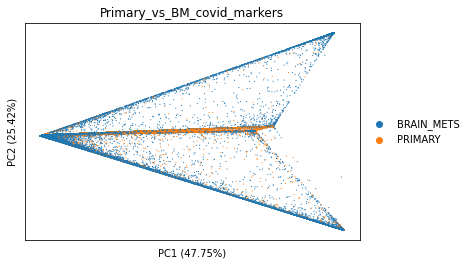

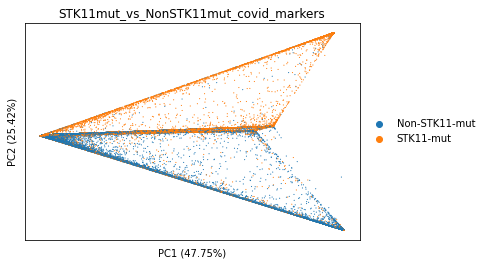

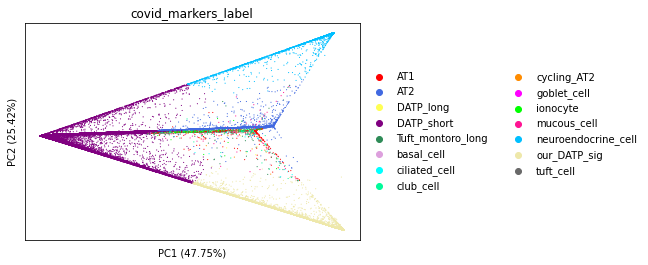

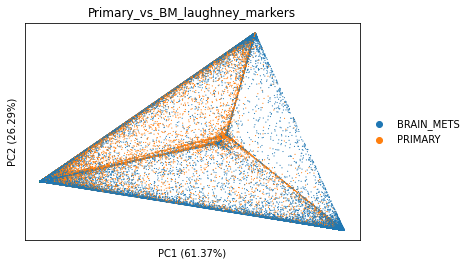

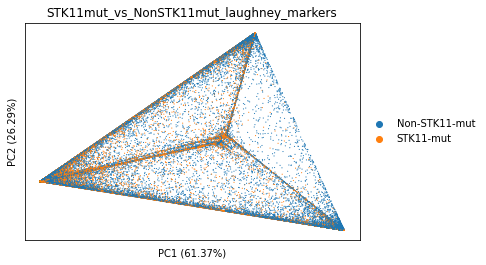

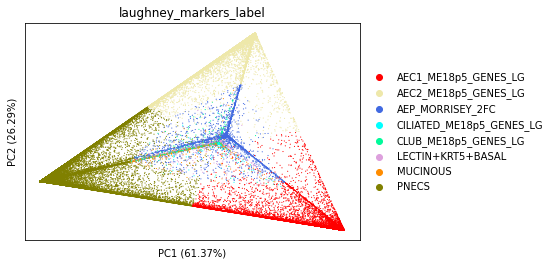

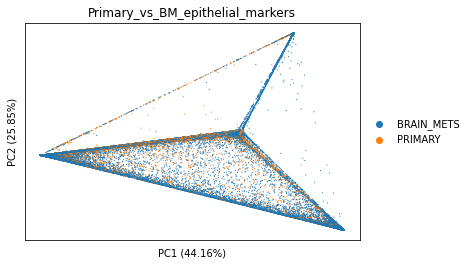

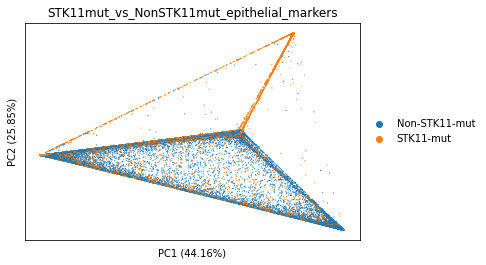

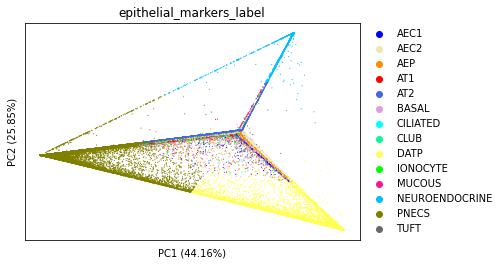

0

In [64]:


pdf_merger = ['pdfunite']


    

for y in adata_objs:
    adata_objs[y].obs["Primary_vs_BM_"+y+"_markers"] = adata_objs[y].obs["Primary_vs_BM"]
    adata_objs[y].obs["STK11mut_vs_NonSTK11mut_"+y+"_markers"] = adata_objs[y].obs["STK11mut_vs_NonSTK11mut"]
    adata_objs[y].obs[y+"_markers_label"] = adata_objs[y].obs["label"]
    
    sc.pl.pca(adata_objs[y], color=["Primary_vs_BM_"+y+"_markers"],
                         save='_primary_vs_bm_on_cellassign'+y+'.pdf',size=5,annotate_var_explained = True)
    sc.pl.pca(adata_objs[y], color=["STK11mut_vs_NonSTK11mut_"+y+"_markers"],
                         save='_stk11_on_cellassign'+y+'.pdf', size=5, annotate_var_explained = True)
    sc.pl.pca(adata_objs[y], color=[y+"_markers_label"],
                         palette=colormaps[y],
                         save='_on_cellassign_labels_'+y+'.pdf',size=5, annotate_var_explained = True)
    
    pdf_merger.append('figures/pca_primary_vs_bm_on_cellassign'+y+'.pdf')
    pdf_merger.append('figures/pca_stk11_on_cellassign'+y+'.pdf')
    pdf_merger.append('figures/pca_on_cellassign_labels_'+y+'.pdf')

pdf_merger.append("pdfcombinedfigures/IntegratedTumorCellAssignResults.pdf")
subprocess.call(pdf_merger)




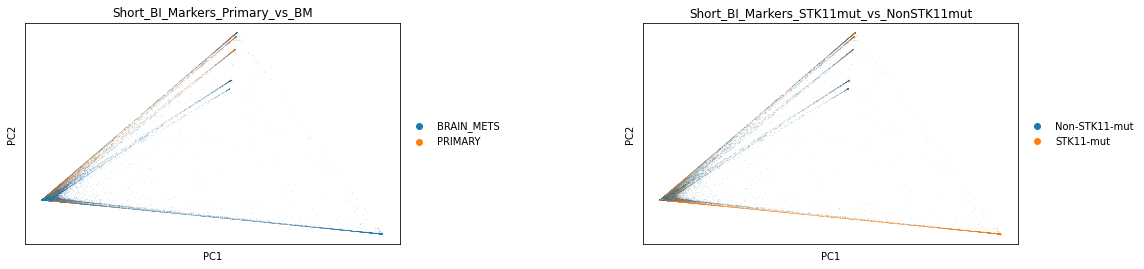

In [30]:
bi_colormap = {
 'AT1': '#ff0000',
 'AEP':'#ff8c00',
 'AT2' : '#4169e1',
 'Basal' : '#dda0dd',
 'basal_cell' : '#dda0dd',
 'ciliated_cell' :'#00ffff',
 'Ciliated' :'#00ffff',
 'club_cell'  : '#00fa9a',
 'Club cells'  : '#00fa9a',
 'Goblet': '#ff00ff',    
 'DATP'  : '#ffff54',
 'neuroendocrine_cell': "#00bfff",
    
}


short_adata.obs["Short_BI_Markers_Primary_vs_BM"] = short_adata.obs['Primary_vs_BM']
short_adata.obs["Short_BI_Markers_STK11mut_vs_NonSTK11mut"] = short_adata.obs['STK11mut_vs_NonSTK11mut']
short_adata.obs["Short_BI_Markers_label"] = short_adata.obs['label']


sc.pl.pca(short_adata, color = ['Short_BI_Markers_Primary_vs_BM', 
                                'Short_BI_Markers_STK11mut_vs_NonSTK11mut'], wspace=0.5, save = "ShortBIMarkersTumor.pdf")



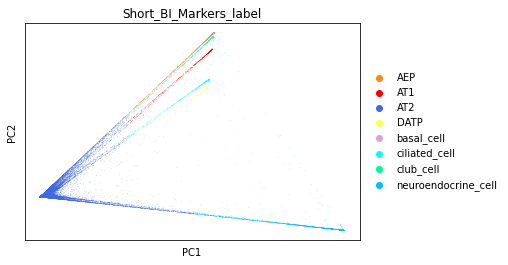

In [31]:
sc.pl.pca(short_adata, color = ['Short_BI_Markers_label'], palette=bi_colormap, save = "ShortBIMarkersLabel.pdf")

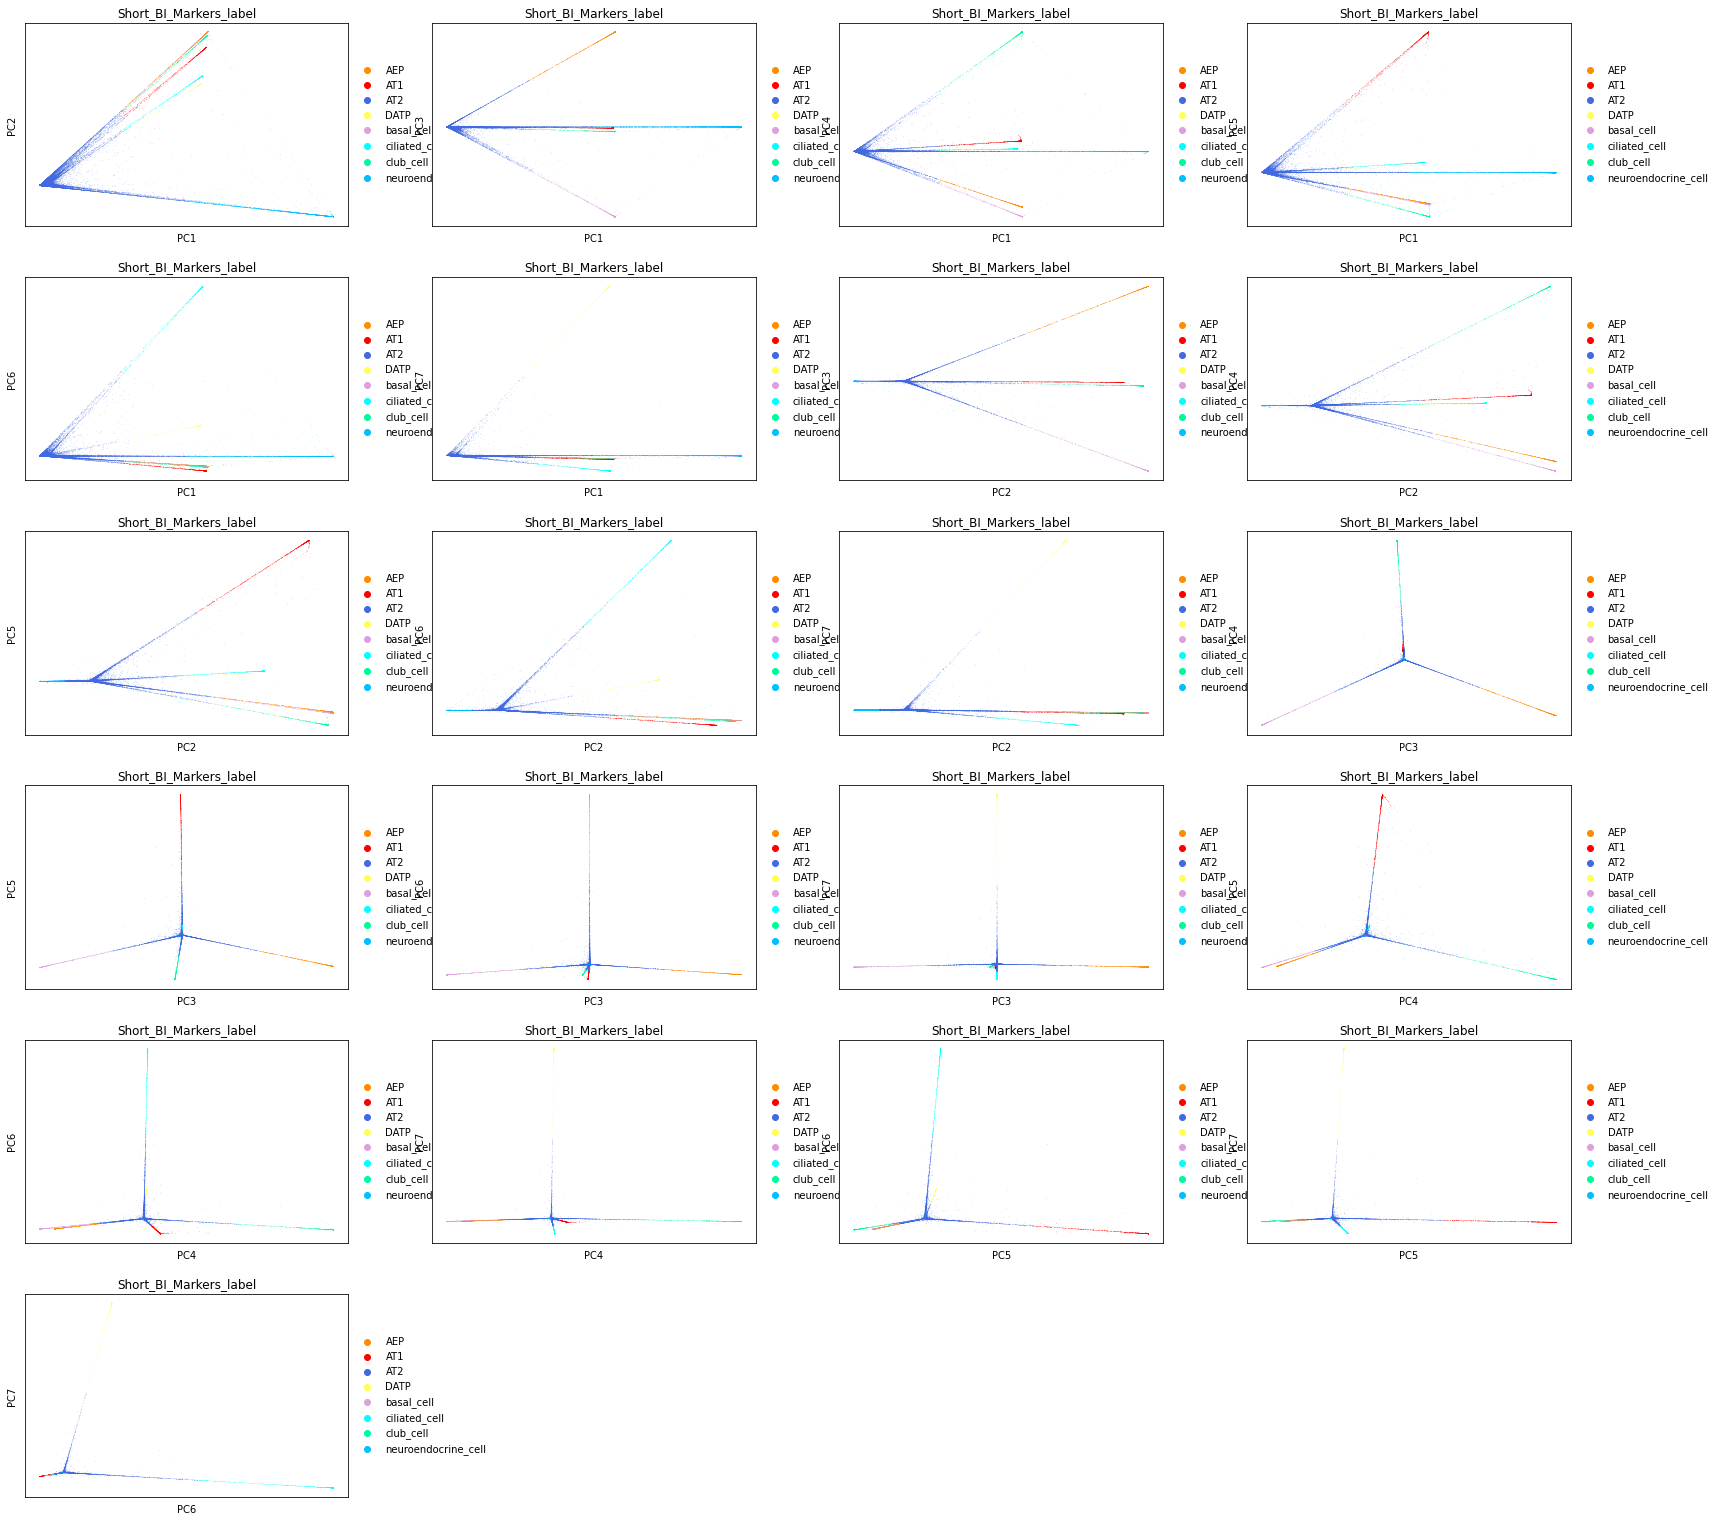

In [32]:
sc.pl.pca(short_adata, color = ['Short_BI_Markers_label'], palette=bi_colormap, components='all')

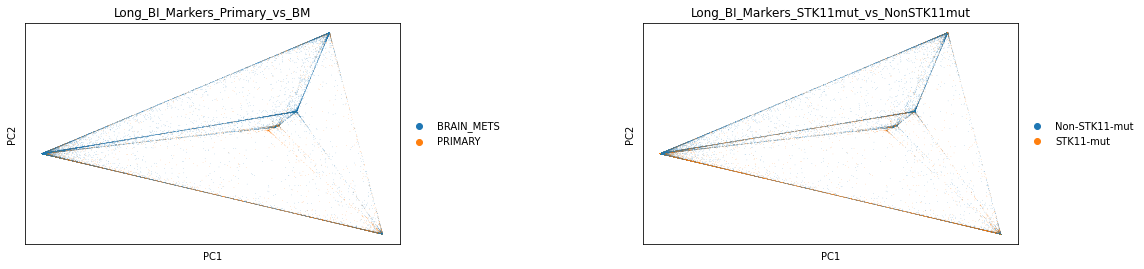

In [33]:
long_adata.obs["Long_BI_Markers_Primary_vs_BM"] = long_adata.obs['Primary_vs_BM']
long_adata.obs["Long_BI_Markers_STK11mut_vs_NonSTK11mut"] = long_adata.obs['STK11mut_vs_NonSTK11mut']
long_adata.obs["Long_BI_Markers_label"] = long_adata.obs['label']



sc.pl.pca(long_adata, color = ['Long_BI_Markers_Primary_vs_BM', 
                                'Long_BI_Markers_STK11mut_vs_NonSTK11mut'], wspace = 0.5, save = "LongBIMarkersTumor.pdf")



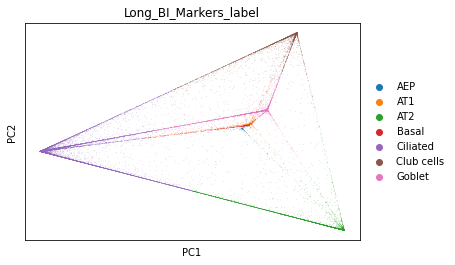

In [34]:
sc.pl.pca(long_adata, color = ['Long_BI_Markers_label'], wspace = 0.5, save = "LongBIMarkersLabel.pdf")

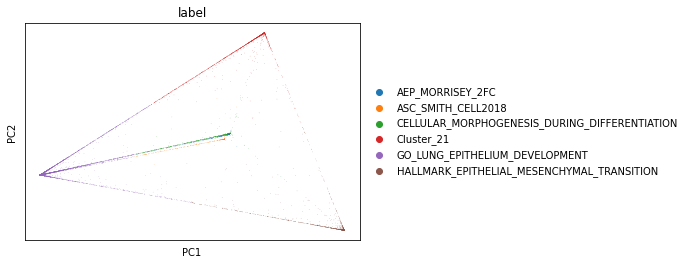

In [36]:
sc.pl.pca(dev_adata, color = ['label']
         )

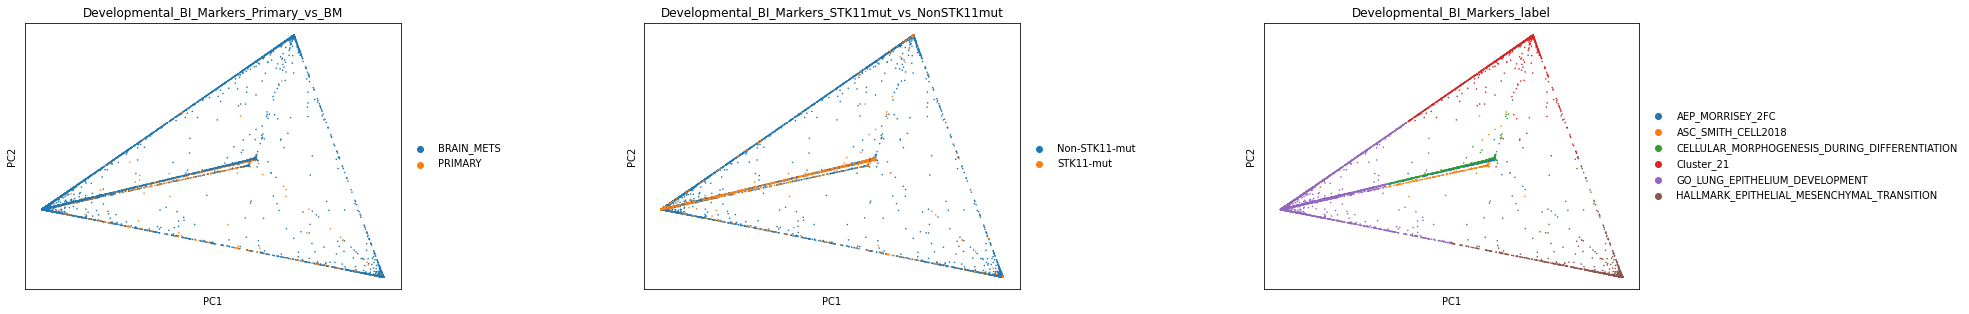

In [16]:
dev_adata.obs["Developmental_BI_Markers_Primary_vs_BM"] = dev_adata.obs['Primary_vs_BM']
dev_adata.obs["Developmental_BI_Markers_STK11mut_vs_NonSTK11mut"] = dev_adata.obs['STK11mut_vs_NonSTK11mut']
dev_adata.obs["Developmental_BI_Markers_label"] = dev_adata.obs['label']

sc.pl.pca(dev_adata, color = ['Developmental_BI_Markers_Primary_vs_BM', 
                                'Developmental_BI_Markers_STK11mut_vs_NonSTK11mut',
                                'Developmental_BI_Markers_label'], wspace = 0.5, size = 10, save = "DevBIMarkersTumor.pdf")







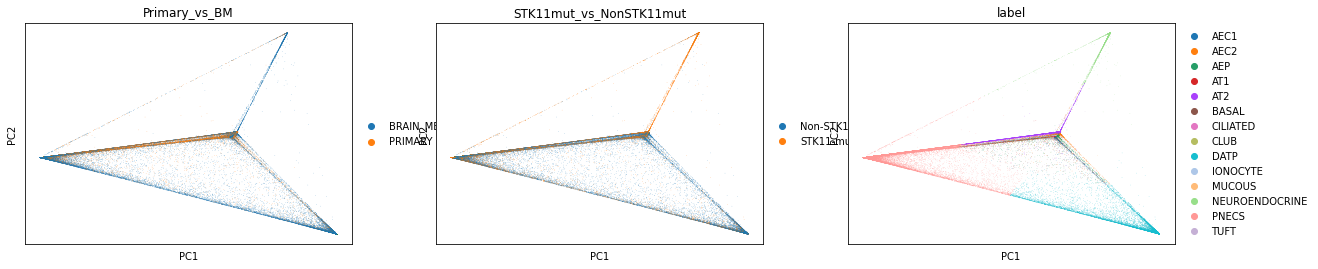

{'AEC1',
 'AEC2',
 'AEP',
 'AT1',
 'AT2',
 'BASAL',
 'CILIATED',
 'CLUB',
 'DATP',
 'IONOCYTE',
 'MUCOUS',
 'NEUROENDOCRINE',
 'PNECS',
 'TUFT'}

In [14]:
sc.pl.pca(epi_adata, color = ['Primary_vs_BM', 
                              'STK11mut_vs_NonSTK11mut', 
                              'label'])
set(epi_adata.obs['label'])

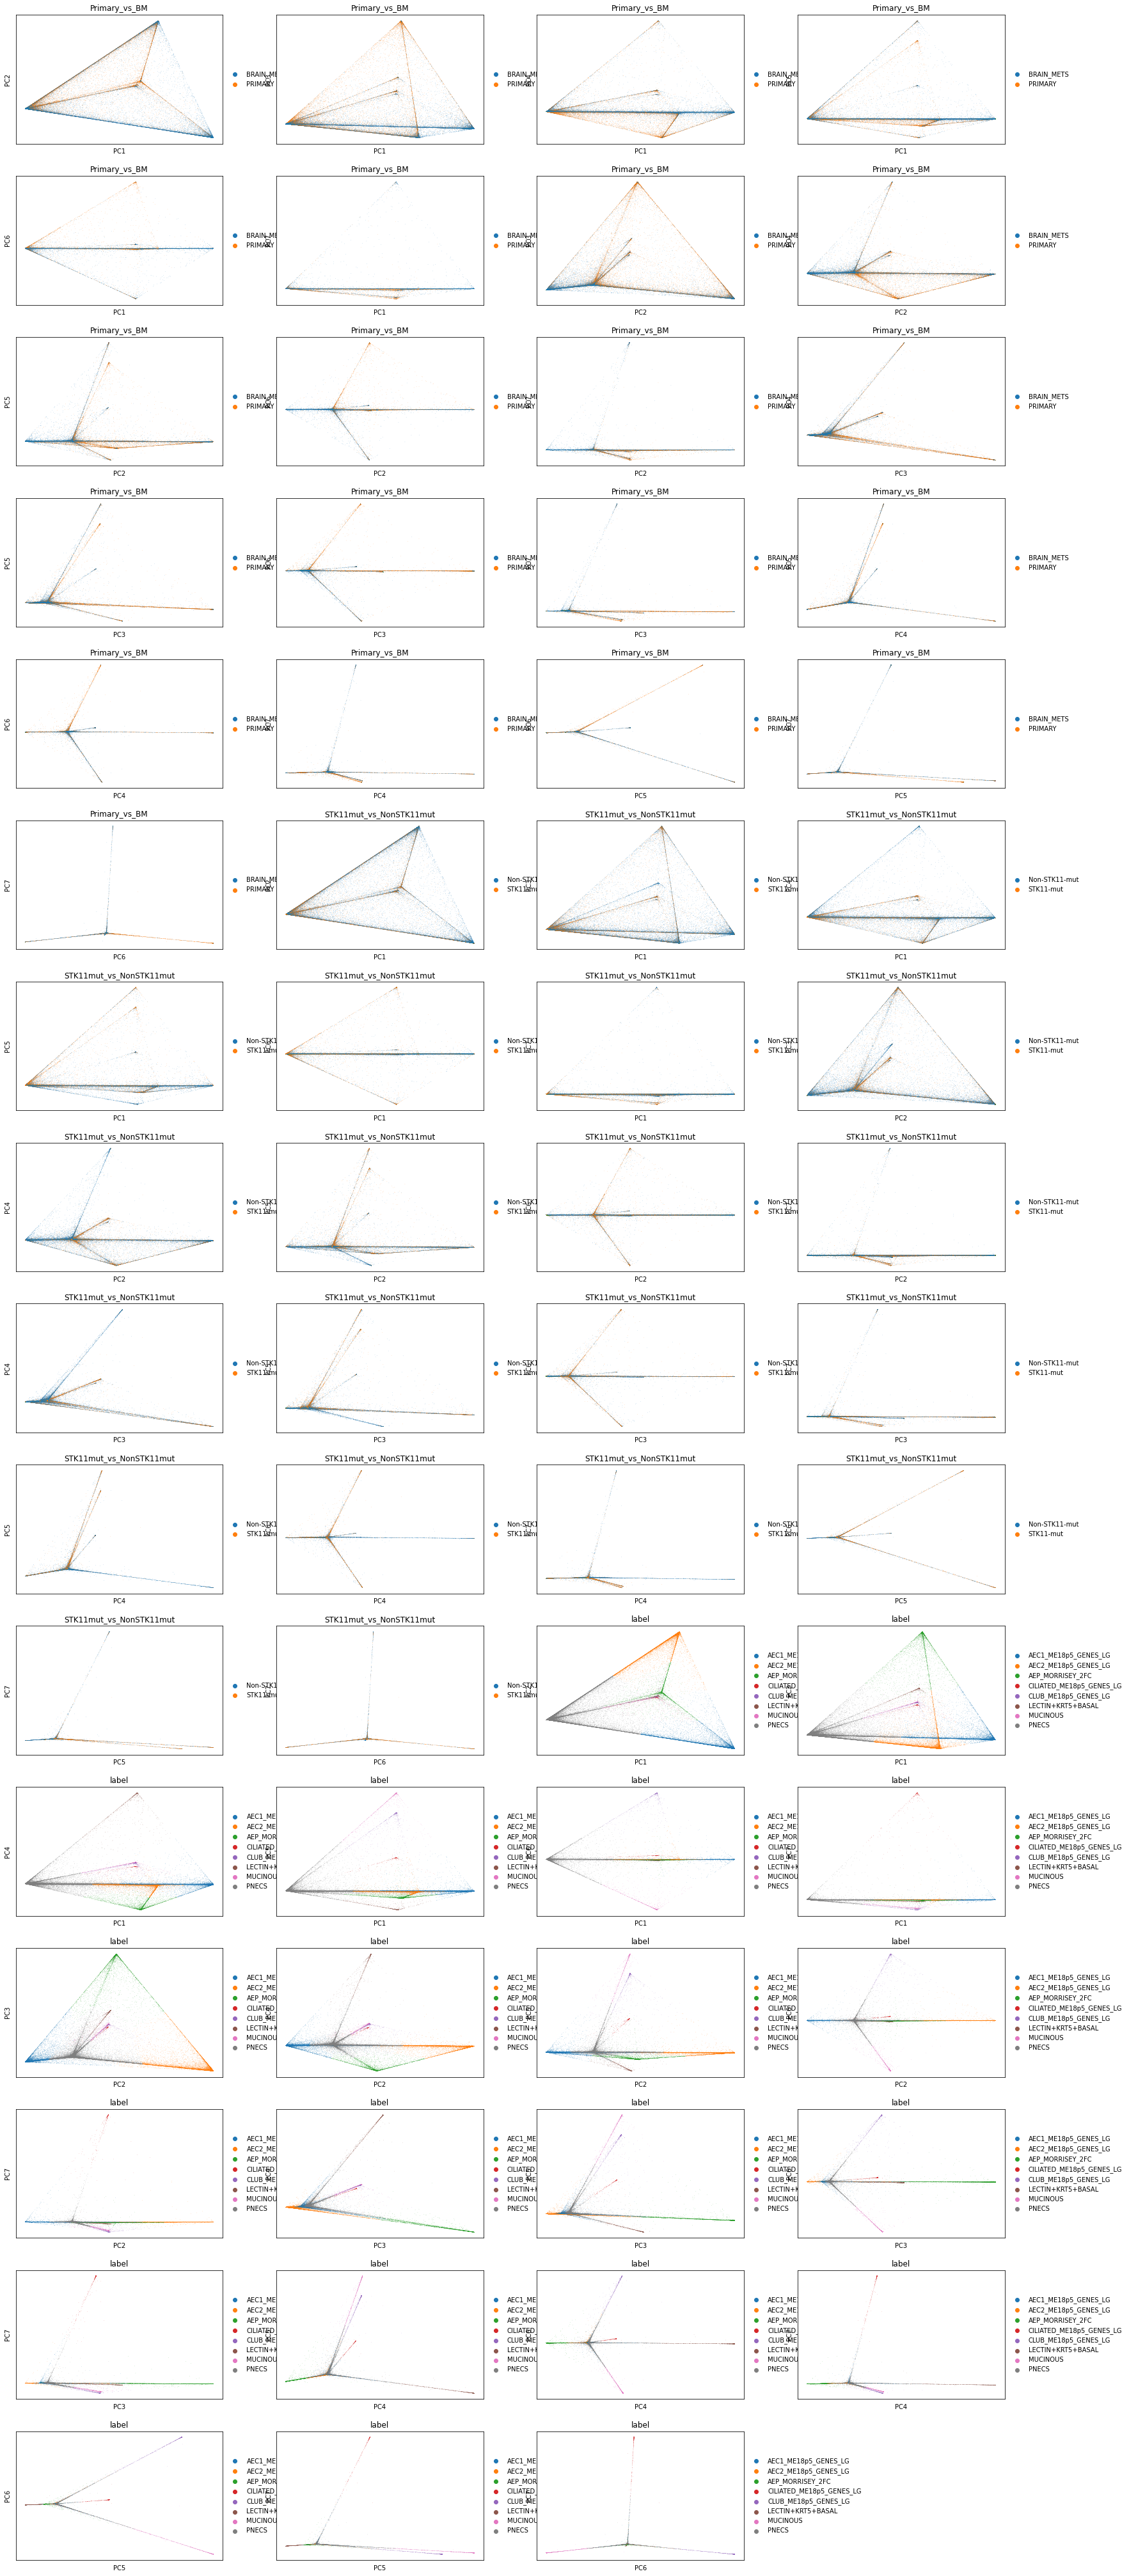

In [15]:
sc.pl.pca(laugh_adata, components='all', color = ['Primary_vs_BM', 
                                'STK11mut_vs_NonSTK11mut',
                                'label'])

In [16]:
sc.pp.log1p(laugh_adata)
sc.pp.scale(laugh_adata, max_value=10)
laugh_adata

AnnData object with n_obs × n_vars = 154771 × 8
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.rps', 'percent.rpl', 'percent.rp', 'patient_long', 'patient', 'predicted_doublets', 'doublet_scores', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'celltype_bped_main', 'celltype_bped_fine', 'celltype_iced_main', 'celltype_iced_fine', 'celltype_hpca_main', 'celltype_hpca_fine', 'celltype_mid_main', 'celltype_mid_fine', 'Primary_vs_BM', 'STK11mut_vs_NonSTK11mut', 'Primary_BM_STK_NonSTK', 'Primary_vs_BM_vs_CHEST_WALL_MET', 'Primary_BM_STK_NonSTK_CHEST_WALL_MET', 'size_factor', 'label'
    var: 'mean', 'std'
    uns: 'pca', 'Primary_vs_BM_colors', 'STK11mut_vs_NonSTK11mut_colors', 'label_colors', 'log1p'
    obsm: 'X_pca'
    varm: 'PCs'

In [18]:
pd.DataFrame(laugh_adata.X)

,0,1,2,3,4,5,6,7
0,-0.415364,-0.548236,-0.057008,-0.086974,0.658654,-0.139786,-0.223936,1.976700
1,-0.415364,-0.548251,-0.056832,-0.087577,0.836923,-0.139295,-0.223952,-0.100441
2,-0.415364,-0.548251,-0.056832,-0.087439,0.836759,-0.138091,-0.223951,-0.100441
3,-0.415364,-0.548252,-0.056832,-0.087620,0.836877,-0.138905,-0.223953,-0.100441
4,-0.415364,-0.548252,-0.056832,-0.087591,0.837110,-0.140749,-0.223952,-0.100441
...,...,...,...,...,...,...,...,...
154766,-0.415364,2.037297,-0.058458,-0.089025,-1.382552,-0.142196,-0.223660,-0.100836
154767,-0.415364,-0.548252,-0.058458,-0.089025,0.837516,-0.142196,-0.223954,-0.100836
154768,-0.415364,-0.548250,-0.056833,-0.072012,0.835958,-0.141103,-0.223826,-0.100441
154769,-0.415352,-0.548251,1.235025,-0.087988,0.770155,-0.141148,-0.223953,-0.100457


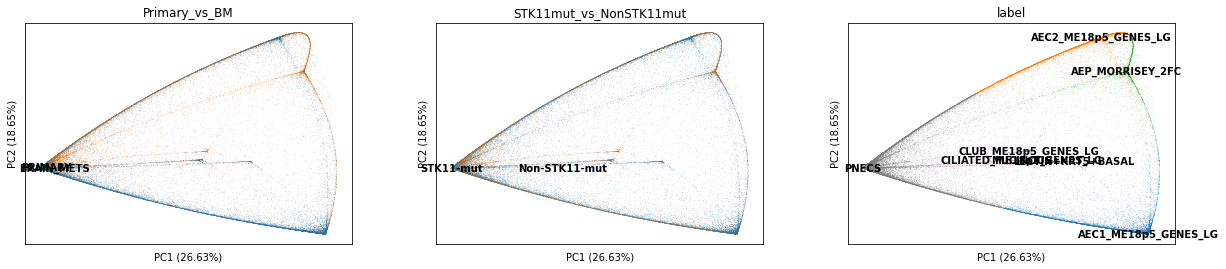

In [19]:
sc.tl.pca(laugh_adata)
sc.pl.pca(laugh_adata, color = ['Primary_vs_BM', 
                              'STK11mut_vs_NonSTK11mut', 
                              'label'], annotate_var_explained = True, legend_loc='on data')

In [21]:
sc.pp.neighbors(laugh_adata, n_neighbors=5, n_pcs=40)


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [22]:
sc.tl.umap(laugh_adata)

KeyboardInterrupt: 

In [23]:
sc.tl.draw_graph(laugh_adata)

KeyboardInterrupt: 

In [ ]:
sc.pl.draw_graph(laugh_adata)

In [24]:
laugh_adata.obs['label'].value_counts()


PNECS                       95907
AEC1_ME18p5_GENES_LG        31831
AEC2_ME18p5_GENES_LG        18314
AEP_MORRISEY_2FC             4523
LECTIN+KRT5+BASAL            2177
MUCINOUS                      888
CLUB_ME18p5_GENES_LG          782
CILIATED_ME18p5_GENES_LG      349
Name: label, dtype: int64

In [36]:
epi_adata.obs['label'].value_counts()


PNECS             72360
DATP              30562
NEUROENDOCRINE    22567
AT2                8972
AEC2               5287
AEP                3787
IONOCYTE           3402
BASAL              2551
AT1                2123
AEC1               1224
MUCOUS              747
CLUB                544
TUFT                334
CILIATED            311
Name: label, dtype: int64

/Users/kluthria/Projects/Summer22/summer_venv/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


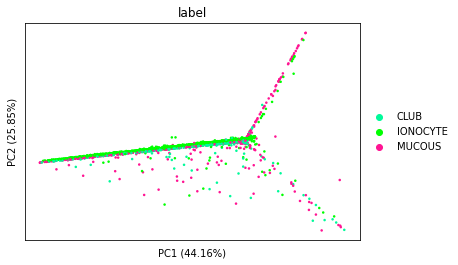

In [37]:
to_plot = ['IONOCYTE', 'CLUB', 'MUCOUS']


sc.pl.pca(epi_adata[epi_adata.obs["label"].isin(to_plot),:], color = [ 
                              'label'], annotate_var_explained = True, 
                                 palette = epi_colormap)

In [26]:
epi_adata.obs['label'].value_counts()


PNECS             72360
DATP              30562
NEUROENDOCRINE    22567
AT2                8972
AEC2               5287
AEP                3787
IONOCYTE           3402
BASAL              2551
AT1                2123
AEC1               1224
MUCOUS              747
CLUB                544
TUFT                334
CILIATED            311
Name: label, dtype: int64

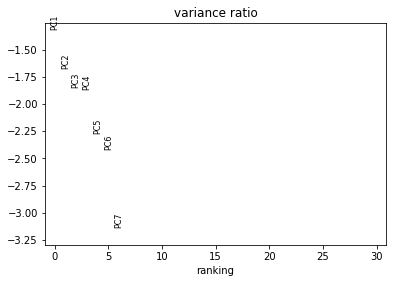

In [17]:
sc.pl.pca_variance_ratio(laugh_adata, log=True)


In [18]:
sc.pp.neighbors(laugh_adata, n_neighbors=5, n_pcs=40)


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [19]:
sc.tl.umap(laugh_adata)


/Users/kluthria/Projects/Summer22/summer_venv/lib/python3.9/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


In [20]:
laugh_adata

AnnData object with n_obs × n_vars = 154771 × 8
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.rps', 'percent.rpl', 'percent.rp', 'patient_long', 'patient', 'predicted_doublets', 'doublet_scores', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'celltype_bped_main', 'celltype_bped_fine', 'celltype_iced_main', 'celltype_iced_fine', 'celltype_hpca_main', 'celltype_hpca_fine', 'celltype_mid_main', 'celltype_mid_fine', 'Primary_vs_BM', 'STK11mut_vs_NonSTK11mut', 'Primary_BM_STK_NonSTK', 'Primary_vs_BM_vs_CHEST_WALL_MET', 'Primary_BM_STK_NonSTK_CHEST_WALL_MET', 'size_factor', 'label', 'Primary_vs_BM_laughney_markers', 'STK11mut_vs_NonSTK11mut_laughney_markers', 'laughney_markers_label'
    var: 'mean', 'std'
    uns: 'pca', 'Primary_vs_BM_laughney_markers_colors', 'STK11mut_vs_NonSTK11mut_laughney_markers_colors', 'laughney_markers_label_colors', 'Primary_vs_BM_colors', 'STK11mut_vs_NonSTK11mut_colors', 'label_colors', 'log1p', 'neighbors', '

In [21]:
pd.DataFrame(covid_adata.X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,5.488683e-04,1.012520e-04,1.215478e-03,0.0,5.695104e-02,1.872534e-05,4.084938e-04,9.433755e-03,2.284237e-05,1.943457e-03,2.347768e-07,0.0,1.009099e-11,0.0,5.562001e-06,1.995021e-05,9.293303e-01,2.415755e-10,1.497228e-09
1,5.818798e-04,1.073445e-04,1.288713e-03,0.0,8.457535e-06,1.985620e-05,4.330424e-04,1.000180e-02,2.421733e-05,2.060621e-03,1.675170e-07,0.0,3.604411e-12,0.0,3.289535e-06,2.115505e-05,9.854494e-01,3.793420e-12,3.104440e-11
2,5.819675e-04,1.073590e-04,1.288820e-03,0.0,8.461185e-06,1.985608e-05,4.331215e-04,1.000286e-02,2.422020e-05,2.060748e-03,1.676765e-07,0.0,5.803512e-12,0.0,4.481684e-06,2.115492e-05,9.854468e-01,3.800027e-12,8.417919e-11
3,5.819674e-04,1.073589e-04,1.288818e-03,0.0,8.461184e-06,1.985607e-05,4.331206e-04,1.000286e-02,2.422019e-05,2.060746e-03,1.676743e-07,0.0,7.211979e-12,0.0,4.723665e-06,2.115491e-05,9.854466e-01,3.800026e-12,1.039208e-11
4,5.819020e-04,1.073480e-04,1.288741e-03,0.0,8.458488e-06,1.985618e-05,4.330633e-04,1.000209e-02,2.421810e-05,2.060654e-03,1.675582e-07,0.0,2.609957e-12,0.0,3.087300e-06,2.115502e-05,9.854493e-01,3.795073e-12,5.091257e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154766,1.502831e-14,2.772371e-15,3.328206e-14,0.0,2.184802e-16,5.127681e-16,1.118452e-14,2.583094e-13,6.254497e-16,1.000000e+00,4.329093e-18,0.0,6.744941e-23,0.0,1.819913e-16,5.463096e-16,2.544839e-11,9.809219e-23,1.013596e-19
154767,2.936632e-21,5.417396e-22,6.503524e-21,0.0,4.269304e-23,1.001979e-22,2.185535e-21,1.000000e+00,1.222169e-22,1.039882e-20,8.459622e-25,0.0,1.318074e-29,0.0,1.764347e-21,1.067521e-22,1.681623e-16,1.916872e-29,1.438667e-24
154768,5.818832e-04,1.073436e-04,1.288653e-03,0.0,8.459442e-06,1.985390e-05,4.330560e-04,1.000153e-02,2.421691e-05,2.060492e-03,1.676227e-07,0.0,2.611678e-12,0.0,1.151030e-04,2.115260e-05,9.853381e-01,3.798138e-12,4.862183e-09
154769,5.802046e-04,1.070340e-04,1.284936e-03,0.0,8.435038e-06,1.979663e-05,4.318067e-04,9.972678e-03,2.414705e-05,2.054548e-03,1.671391e-07,0.0,2.604144e-12,0.0,2.999654e-03,2.109158e-05,9.824955e-01,3.787181e-12,4.786961e-09


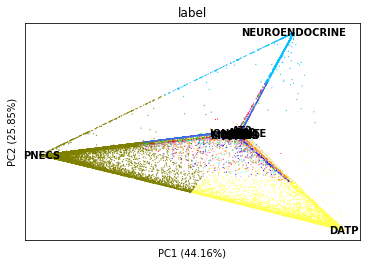

In [33]:
sc.pl.pca(epi_adata, color = [ 
                              'label'], annotate_var_explained = True, 
                                 palette = epi_colormap,legend_loc='on data',
         size=5)

In [ ]:
sc.pl.pca(epi_adata[epi_adata.obs["label"].isin(to_plot),:], color = [ 
                              'label'], annotate_var_explained = True, 
                                 palette = epi_colormap)

In [31]:
sc.pp.neighbors(epi_adata)


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [32]:
sc.tl.draw_graph(epi_adata)

KeyboardInterrupt: 